## Pada notebook ini akan dilakukan pencarian/tuning parameter terbaik pada beberapa model. Jika telah mendapatkan parameter, akan kembali ke notebook awal.

In [1]:
import pandas as pd

In [2]:
path = 'preprocessed_data.csv'
df = pd.read_csv(path)

df = df.sample(n=25000, random_state=42)


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'n_neighbors': np.int64(30), 'p': 1, 'weights': 'distance'}
Best negative MSE: -97.07414778523402
Test MSE: 100.8603
Test R² Score: 0.1837


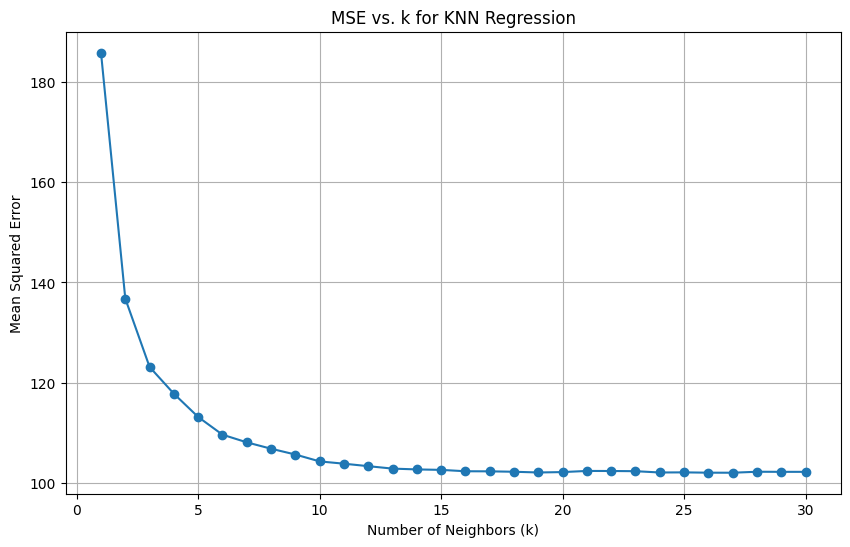

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best negative MSE:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² Score: {r2:.4f}")

k_range = np.arange(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, 'o-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k for KNN Regression')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Decision Tree Results:
Best parameters: {'max_depth': 5}
Best negative MSE: -101.02413162261027
Test MSE: 104.8762
Test R² Score: 0.1512


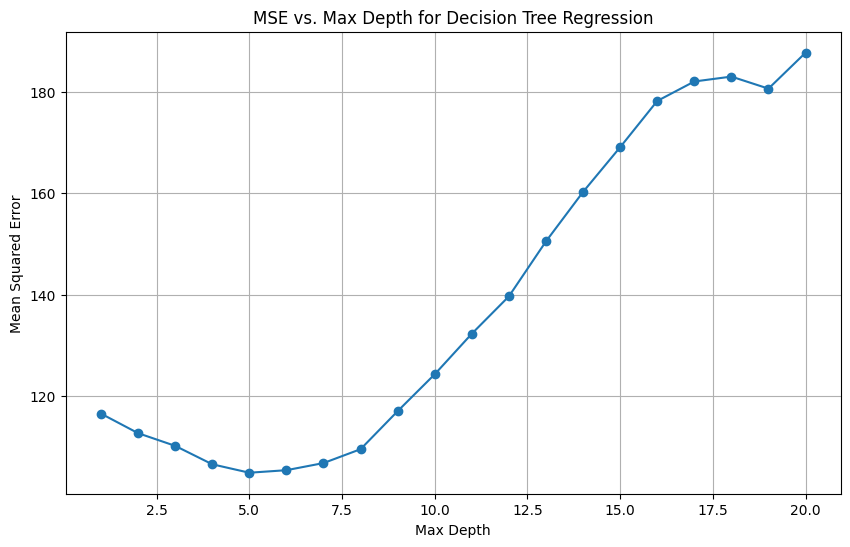

In [5]:
from sklearn.tree import DecisionTreeRegressor

dt_param_grid = {
    'max_depth': range(1, 21)
}

dt = DecisionTreeRegressor(random_state=42)

dt_grid_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

dt_grid_search.fit(X_train, y_train)

print("\nDecision Tree Results:")
print("Best parameters:", dt_grid_search.best_params_)
print("Best negative MSE:", dt_grid_search.best_score_)

best_dt = dt_grid_search.best_estimator_

dt_y_pred = best_dt.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Test MSE: {dt_mse:.4f}")
print(f"Test R² Score: {dt_r2:.4f}")

depths = range(1, 21)
dt_scores = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    dt_y_pred = dt.predict(X_test)
    dt_scores.append(mean_squared_error(y_test, dt_y_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, dt_scores, 'o-')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Max Depth for Decision Tree Regression')
plt.grid(True)
plt.show()



SVR with linear kernel:
Test MSE: 101.8964
Test R² Score: 0.1753

SVR with poly kernel:
Test MSE: 233.4921
Test R² Score: -0.8898

SVR with rbf kernel:
Test MSE: 97.7560
Test R² Score: 0.2088

SVR with sigmoid kernel:
Test MSE: 2505.5224
Test R² Score: -19.2788


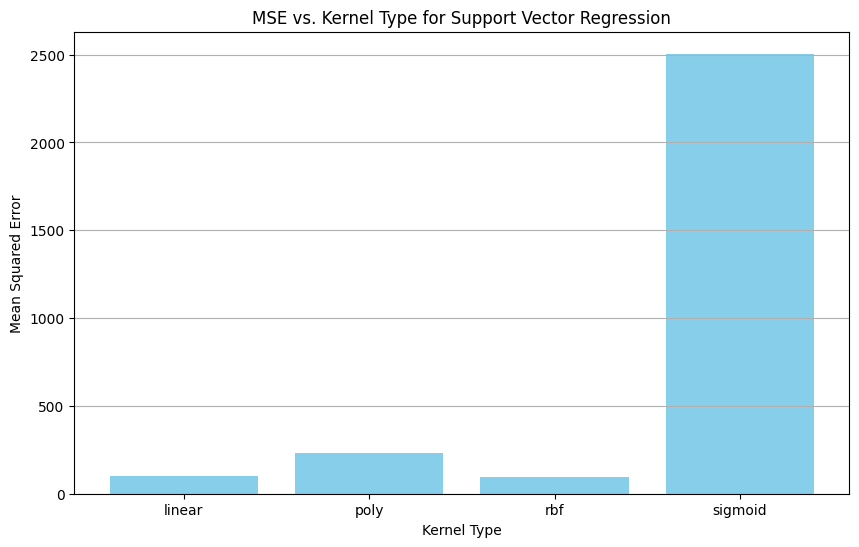

In [6]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svr_scores = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    
    svr_y_pred = svr.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, svr_y_pred)
    svr_r2 = r2_score(y_test, svr_y_pred)
    
    svr_scores.append(svr_mse)
    
    print(f"\nSVR with {kernel} kernel:")
    print(f"Test MSE: {svr_mse:.4f}")
    print(f"Test R² Score: {svr_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(kernels, svr_scores, color='skyblue')
plt.xlabel('Kernel Type')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Kernel Type for Support Vector Regression')
plt.grid(True, axis='y')
plt.show()



AdaBoost Regressor (default parameters):
Test MSE: 203.3342
Test R² Score: -0.6457

Best n_estimators parameter: 10

AdaBoost Regressor (best parameters):
Test MSE: 121.4304
Test R² Score: 0.0172


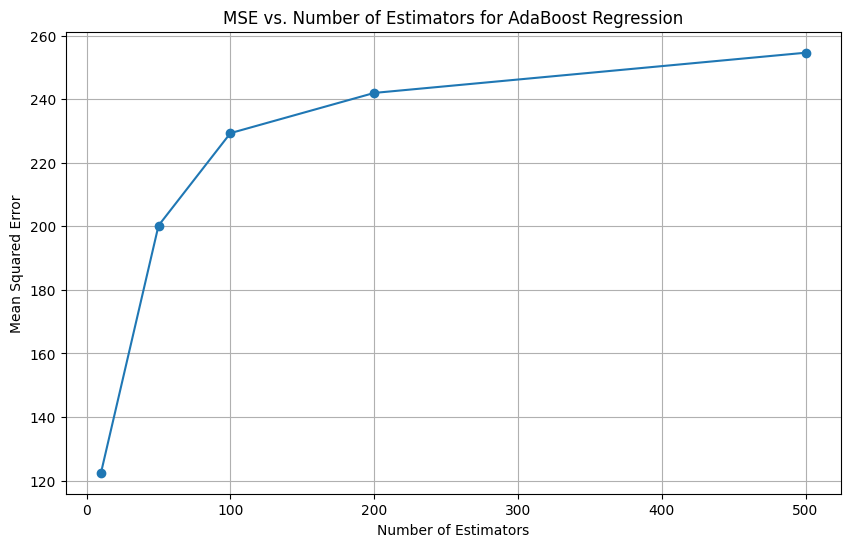

In [7]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(random_state=42)
ada_reg.fit(X_train, y_train)

ada_y_pred = ada_reg.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_y_pred)
ada_r2 = r2_score(y_test, ada_y_pred)

print(f"\nAdaBoost Regressor (default parameters):")
print(f"Test MSE: {ada_mse:.4f}")
print(f"Test R² Score: {ada_r2:.4f}")

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500]
}

grid_search = GridSearchCV(
    AdaBoostRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
print(f"\nBest n_estimators parameter: {best_n_estimators}")

best_ada_reg = AdaBoostRegressor(n_estimators=best_n_estimators, random_state=42)
best_ada_reg.fit(X_train, y_train)

best_ada_y_pred = best_ada_reg.predict(X_test)
best_ada_mse = mean_squared_error(y_test, best_ada_y_pred)
best_ada_r2 = r2_score(y_test, best_ada_y_pred)

print(f"\nAdaBoost Regressor (best parameters):")
print(f"Test MSE: {best_ada_mse:.4f}")
print(f"Test R² Score: {best_ada_r2:.4f}")

n_estimators_range = param_grid['n_estimators']
cv_results = grid_search.cv_results_
mse_scores = -cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_scores, 'o-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Estimators for AdaBoost Regression')
plt.grid(True)
plt.show()


Parameter terbaik:
- KNN: n = ~25
- Decision Tree: max_depth = 5
- SVR: kernel = 'rbf'
- AdaBoost: n_estimator=10

In [8]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline

# degrees = [1, 2, 3, 4, 5]
# poly_results = []

# for degree in degrees:
#     poly_reg = Pipeline([
#         ('poly', PolynomialFeatures(degree=degree)),
#         ('linear', LinearRegression())
#     ])
    
#     # Train the model
#     poly_reg.fit(X_train, y_train)
    
#     # Make predictions
#     poly_y_pred = poly_reg.predict(X_test)
    
#     # Calculate metrics
#     poly_mse = mean_squared_error(y_test, poly_y_pred)
#     poly_r2 = r2_score(y_test, poly_y_pred)
    
#     poly_results.append((degree, poly_mse, poly_r2))
    
#     print(f"\nPolynomial Regression (degree={degree}):")
#     print(f"Test MSE: {poly_mse:.4f}")
#     print(f"Test R² Score: {poly_r2:.4f}")

# plt.figure(figsize=(10, 6))
# degrees, mse_scores, r2_scores = zip(*poly_results)
# plt.plot(degrees, mse_scores, 'o-', label='MSE')
# plt.xlabel('Polynomial Degree')
# plt.ylabel('Mean Squared Error')
# plt.title('MSE vs. Polynomial Degree')
# plt.grid(True)
# plt.show()